## Imports

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [179]:
#  Import data

In [180]:
train_data=pd.read_csv('train.csv')

In [181]:
test=pd.read_csv('test.csv')

## Preprocessing


In [182]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [183]:
train=train_data[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']]

In [184]:
data=pd.concat([train,test])
data['Ind']=range(0,2919)
data.set_index('Ind',inplace=True)

In [185]:
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Ind,,,,,,,,,,,,,,,,,,,,,
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [186]:
data.tail(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Ind,,,,,,,,,,,,,,,,,,,,,
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


## Missing data handling

In [187]:
# Collecting the features which have missing data

miss_cols={}
miss_dict=dict(data.isnull().sum()>0) 
for i in miss_dict:
    if miss_dict[i]:
        miss_cols.update({i:data[i].isnull().sum()})
    

In [188]:
# Missing data columns

miss_cols

{'Alley': 2721,
 'BsmtCond': 82,
 'BsmtExposure': 82,
 'BsmtFinSF1': 1,
 'BsmtFinSF2': 1,
 'BsmtFinType1': 79,
 'BsmtFinType2': 80,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'BsmtQual': 81,
 'BsmtUnfSF': 1,
 'Electrical': 1,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'Fence': 2348,
 'FireplaceQu': 1420,
 'Functional': 2,
 'GarageArea': 1,
 'GarageCars': 1,
 'GarageCond': 159,
 'GarageFinish': 159,
 'GarageQual': 159,
 'GarageType': 157,
 'GarageYrBlt': 159,
 'KitchenQual': 1,
 'LotFrontage': 486,
 'MSZoning': 4,
 'MasVnrArea': 23,
 'MasVnrType': 24,
 'MiscFeature': 2814,
 'PoolQC': 2909,
 'SaleType': 1,
 'TotalBsmtSF': 1,
 'Utilities': 2}

### 'Alley'

In [189]:
data['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [190]:
data.drop(columns='Alley',inplace=True)

data['Alley'].fillna(value='NoAlley',inplace=True)


### 'BsmtCond'

In [191]:
data['BsmtCond'].value_counts()

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [192]:
data['BsmtCond'].fillna(value='TA',inplace=True)

In [193]:
data['BsmtCond'].isnull().sum()

0

### 'BsmtExposure'

In [194]:
data['BsmtExposure'].value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

data['BsmtExposure'].fillna(value='No',inplace=True)

data['BsmtExposure'].isnull().sum()

In [195]:
data.drop(columns='BsmtExposure',inplace=True)

### 'BsmtFinSF1' &  'BsmtFinType2'

In [196]:
data['BsmtFinSF2'].fillna(value=0.0,inplace=True)

In [197]:
data['BsmtFinSF1'].fillna(value=0.0,inplace=True)

In [198]:
data['BsmtFinSF1'].isnull().sum()

0

In [199]:
data['BsmtFinSF2'].isnull().sum()

0

### 'BsmtFinType1' & 'BsmtFinType2'

In [200]:
data['BsmtFinType1'].value_counts()

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

data['BsmtFinType1'].fillna(value='Unf',inplace=True)

data['BsmtFinType2'].value_counts()

data['BsmtFinType2'].fillna(value='Unf',inplace=True)

In [201]:
data.drop(columns='BsmtFinType1',inplace=True)
data.drop(columns='BsmtFinType2',inplace=True)

###  'BsmtFullBath' & 'BsmtHalfBath'

In [202]:
data['BsmtFullBath'].value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

data[data['BsmtFullBath'].isnull()]['BsmtCond']

In [203]:
data['BsmtFullBath'].fillna(value=0.0,inplace=True)

In [204]:
data['BsmtHalfBath'].value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

data[data['BsmtHalfBath'].isnull()]['BsmtCond']

In [205]:
data['BsmtHalfBath'].fillna(value=0.0,inplace=True)

### BsmtQual

In [206]:
data['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

data['BsmtQual'].fillna('TA',inplace=True)

In [207]:
data.drop(columns='BsmtQual',inplace=True)

data['BsmtQual'].isnull().sum()

### 'BsmtUnfSF'

In [208]:
data['BsmtUnfSF'].value_counts()

0.0       241
384.0      19
728.0      14
672.0      13
600.0      12
572.0      11
216.0      11
100.0      11
816.0      11
624.0      10
270.0      10
300.0      10
264.0       9
396.0       9
280.0       9
186.0       9
768.0       9
780.0       8
546.0       8
348.0       8
294.0       8
440.0       8
162.0       8
480.0       8
832.0       8
108.0       8
840.0       8
784.0       7
80.0        7
392.0       7
         ... 
127.0       1
795.0       1
214.0       1
1098.0      1
584.0       1
532.0       1
983.0       1
79.0        1
388.0       1
559.0       1
1616.0      1
889.0       1
1078.0      1
1411.0      1
999.0       1
659.0       1
709.0       1
1214.0      1
657.0       1
587.0       1
1146.0      1
2140.0      1
579.0       1
735.0       1
1073.0      1
1503.0      1
445.0       1
958.0       1
1559.0      1
1369.0      1
Name: BsmtUnfSF, Length: 1135, dtype: int64

In [209]:
data['BsmtUnfSF'].fillna(value=0.0,inplace=True)

### 'Electrical'

In [210]:
data['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [211]:
data['Electrical'].fillna(value='SBrkr',inplace=True)

### 'Exterior1st'

In [212]:
data['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [213]:
data['Exterior1st'].fillna(value='VinylSd',inplace=True)

### 'Exterior2nd'

In [214]:
data['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [215]:
data['Exterior2nd'].fillna(value='VinylSd',inplace=True)

### 'Fence'

In [216]:
data['Fence'].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

data['Fence'].fillna(value='MnPrv',inplace=True)

In [217]:
data.drop(columns='Fence',inplace=True)

### 'FireplaceQu'

In [218]:
data['FireplaceQu'].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [219]:
(data[data['FireplaceQu'].isnull()]['Fireplaces']==0).sum()

1420

In [220]:
data['FireplaceQu'].isnull().sum()

1420

data['FireplaceQu'].fillna(value='Gd',inplace=True)

In [221]:
data.drop(columns='FireplaceQu',inplace=True)

### 'Functional'

In [222]:
data['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [223]:
data['Functional'].fillna(value='Typ',inplace=True)

### 'GarageArea'

In [224]:
data[data['GarageArea'].isnull()]['GarageCars']

Ind
2576   NaN
Name: GarageCars, dtype: float64

In [225]:
data['GarageArea'].fillna(value=0.0,inplace=True)

### 'GarageCars'

In [226]:
data['GarageCars'].value_counts()

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [227]:
data[data['GarageCars'].isnull()]['GarageArea']

Ind
2576    0.0
Name: GarageArea, dtype: float64

In [228]:
data['GarageCars'].fillna(0.0,inplace=True)

### 'GarageCond'

In [229]:
data['GarageCond'].value_counts()

TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

data['GarageCond'].fillna(value='TA',inplace=True)

In [230]:
data.drop(columns='GarageCond',inplace=True)

###  'GarageFinish'

In [231]:
data['GarageFinish'].value_counts()

Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64

data['GarageFinish'].fillna(value='Unf',inplace=True)

In [232]:
data.drop(columns='GarageFinish',inplace=True)

### 'GarageQual'

In [233]:
data['GarageQual'].value_counts()

TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

len(data[data['GarageQual'].isnull()]['GarageArea']==0.0)

data['GarageQual'].isnull().sum()

In [234]:
data.drop(columns='GarageQual',inplace=True)

data['GarageQual'].fillna(value='TA',inplace=True)

### 'GarageType'

In [235]:
data['GarageType'].value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

len(data[data['GarageType'].isnull()]['GarageArea']==0.0)

data['GarageType'].isnull().sum()

data['GarageType'].fillna(value='Attchd',inplace=True)

In [236]:
data.drop(columns='GarageType',inplace=True)

### 'GarageYrBlt'

In [237]:
data['GarageYrBlt'].value_counts()

2005.0    142
2006.0    115
2007.0    115
2004.0     99
2003.0     92
1977.0     66
2008.0     61
1998.0     58
2000.0     55
1999.0     54
2002.0     53
1950.0     51
1976.0     50
1993.0     49
1968.0     48
1997.0     44
1958.0     42
1978.0     41
2001.0     41
1956.0     41
1996.0     40
1966.0     39
1994.0     39
1960.0     37
1954.0     37
1967.0     36
1959.0     36
1979.0     35
1964.0     35
1962.0     35
         ... 
1922.0      8
1924.0      8
1935.0      8
1915.0      7
1928.0      7
1936.0      7
1937.0      6
1916.0      6
1923.0      6
1942.0      6
1900.0      6
1927.0      5
1921.0      5
2010.0      5
1947.0      5
1932.0      4
1931.0      4
1934.0      4
1918.0      3
1917.0      2
1914.0      2
1929.0      2
1908.0      1
2207.0      1
1895.0      1
1933.0      1
1943.0      1
1906.0      1
1919.0      1
1896.0      1
Name: GarageYrBlt, Length: 103, dtype: int64


len(data[data['GarageYrBlt'].isnull()]['GarageCars']==0.0)

data['GarageYrBlt'].fillna(0000.0,inplace=True)

In [238]:
data.drop(columns='GarageYrBlt',inplace=True)

### 'KitchenQual'

In [239]:
data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [240]:
data[data['KitchenQual'].isnull()]['KitchenAbvGr']

Ind
1555    1
Name: KitchenAbvGr, dtype: int64

In [241]:
data['KitchenAbvGr'].value_counts()

1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

In [242]:
data[data['KitchenAbvGr']==1]['KitchenQual'].value_counts()

TA    1372
Gd    1146
Ex     205
Fa      61
Name: KitchenQual, dtype: int64

In [243]:
data['KitchenQual'].fillna(value='TA',inplace=True)

### 'LotFrontage'

In [244]:
lfdata=data[data['LotArea'].notnull() & data['LotFrontage'].notnull()]

In [245]:
data.drop(columns='LotFrontage',inplace=True)

sns.distplot(a=lfdata['LotArea']/lfdata['LotFrontage'])

(lfdata['LotArea']/lfdata['LotFrontage']).value_counts()

for i in data[data['LotFrontage'].isnull()].index:
    data['LotFrontage'][i]=data['LotArea'][i]/120.0

data['LotFrontage'].isnull().sum()

### 'MSZoning'

In [246]:
data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [247]:
data['MSZoning'].fillna(value='RL',inplace=True)

### 'MasVnrArea'

In [248]:
data['MasVnrArea'].value_counts()

0.0       1738
120.0       15
176.0       13
200.0       13
216.0       12
180.0       12
144.0       11
72.0        11
108.0       11
16.0        11
340.0       10
80.0         9
210.0        9
128.0        9
196.0        9
256.0        8
178.0        8
40.0         8
302.0        8
170.0        8
132.0        8
260.0        7
300.0        7
203.0        7
186.0        7
456.0        7
420.0        7
50.0         7
252.0        7
106.0        7
          ... 
81.0         1
528.0        1
91.0         1
87.0         1
97.0         1
63.0         1
408.0        1
47.0         1
39.0         1
118.0        1
1170.0       1
376.0        1
584.0        1
322.0        1
634.0        1
532.0        1
1290.0       1
519.0        1
287.0        1
571.0        1
435.0        1
886.0        1
237.0        1
738.0        1
1050.0       1
664.0        1
247.0        1
550.0        1
137.0        1
572.0        1
Name: MasVnrArea, Length: 444, dtype: int64

In [249]:
len(data[data['MasVnrArea'].isnull()]['MasVnrType']==np.nan)

23

In [250]:
data['MasVnrArea'].fillna(value=0.0,inplace=True)

###  'MasVnrType'

In [251]:
data['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [252]:
data['MasVnrType'].fillna('None',inplace=True)

### 'MiscFeature'

In [253]:
data['MiscFeature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

data['MiscFeature'].fillna('Shed',inplace=True)

In [254]:
data.drop(columns='MiscFeature',inplace=True)

### 'PoolQC'

In [255]:
data['PoolQC'].value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [256]:
data[data['PoolArea']!=0][['PoolArea','PoolQC']]

,PoolArea,PoolQC
Ind,,
197,512,Ex
810,648,Fa
1170,576,Gd
1182,555,Ex
1298,480,Gd
1386,519,Fa
1423,738,Gd
1974,144,Ex
2420,368,NaN


data['PoolQC'][2420]='Gd'
data['PoolQC'][2503]='Fa'
data['PoolQC'][2599]='Ex'

In [257]:
data.drop(columns='PoolQC',inplace=True)

data['PoolQC'].fillna(value='NoPoolQC',inplace=True)

### 'SaleType'

In [258]:
data['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [259]:
data['SaleType'].fillna('WD',inplace=True)

### 'TotalBsmtSF'

In [260]:
data['TotalBsmtSF'].value_counts()

0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
768.0     24
816.0     23
728.0     20
1008.0    19
780.0     19
384.0     19
960.0     18
894.0     17
756.0     17
832.0     17
546.0     16
936.0     16
720.0     16
600.0     16
848.0     16
483.0     14
630.0     13
952.0     13
840.0     13
988.0     12
624.0     12
876.0     11
784.0     11
796.0     11
1056.0    10
          ..
1967.0     1
1905.0     1
1679.0     1
1533.0     1
2140.0     1
1994.0     1
1378.0     1
763.0      1
1047.0     1
1376.0     1
904.0      1
370.0      1
1570.0     1
2033.0     1
1709.0     1
1519.0     1
2077.0     1
1550.0     1
797.0      1
699.0      1
559.0      1
396.0      1
1866.0     1
1641.0     1
961.0      1
1949.0     1
1231.0     1
1829.0     1
1475.0     1
1243.0     1
Name: TotalBsmtSF, Length: 1058, dtype: int64

data[data['TotalBsmtSF'].isnull()]['BsmtCond']

In [261]:
data['TotalBsmtSF'].fillna(0.0,inplace=True)

### 'Utilities'

In [262]:
data['Utilities'].isnull().sum()

2

In [263]:
data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [264]:
data['Utilities'].fillna('AllPub',inplace=True)

## Categorical to Numerical

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 65 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 non-

In [266]:
type(data['YrSold'][0])

numpy.int64

In [267]:
num_cols=[]
for i in data.columns:
    if type(data[i][0])==np.int64:
        num_cols.append(i)
    

In [268]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

In [269]:
def cat_num(cat):
    global data
    if len(data[cat].value_counts())==2:
        data[cat]=LabelEncoder().fit_transform(data[cat]) 
    elif len(data[cat].value_counts())>2:
        lb=LabelBinarizer()
        lbr=lb.fit_transform(data[cat])
        lbd=pd.DataFrame(data=lbr,columns=lb.classes_)
        data=pd.concat([data,lbd],axis=1)
        data.drop(columns=cat,inplace=True)

In [270]:
cat_cols=[]
for i in data.columns:
    if type(data[i][0])==str:
        cat_num(i)
        cat_cols.append(i)
        

In [271]:
data.head(1)

,Id,MSSubClass,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Ind,,,,,,,,,,,,,,,,,,,,,
0,1,60,8450,1,0,7,5,2003,2003,196.0,...,0,0,0,1,0,0,0,0,1,0


##  Outlier Detection

In [272]:
def Outlier_Detecter(data,feature):
    Q1=data[feature].quantile(0.25)
    Q3=data[feature].quantile(0.75)
    IQR=Q3-Q1
    Lower_lim=Q1-1.5*IQR
    Upper_lim=Q3+1.5*IQR
    return len(data[(data[feature] < Lower_lim ) & (data[feature] > Upper_lim)])

In [273]:
outliers=[]
for i in num_cols:
    len_out=Outlier_Detecter(data,i)
    if len_out >0:
        outliers.append(i)

In [274]:
outliers

[]

**There is no outliers found**

###  Train Test Split

In [275]:
data.head()

,Id,MSSubClass,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Ind,,,,,,,,,,,,,,,,,,,,,
0,1,60,8450,1,0,7,5,2003,2003,196.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,1,0,6,8,1976,1976,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,1,0,7,5,2001,2002,162.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,1,0,7,5,1915,1970,0.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,1,0,8,5,2000,2000,350.0,...,0,0,0,1,0,0,0,0,1,0


In [276]:
print('Train dataset shape:{0}, \nTest dataset shape:{1}'.format(train.shape,test.shape))

Train dataset shape:(1460, 80), 
Test dataset shape:(1459, 80)


In [277]:
data_copy=data.copy()

In [278]:
data=data_copy.copy()

In [279]:
train.index

RangeIndex(start=0, stop=1460, step=1)

In [280]:
x_train=data[:1460]

x_train=x_train[num_cols]

In [281]:
x_train.drop(columns='Id',inplace=True)

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [282]:
x_test=data[1460:]

x_test=x_test[num_cols]

In [283]:
x_test.drop(columns='Id',inplace=True)

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [284]:
print('Train dataset shape:{0}, \nTest dataset shape:{1}'.format(x_train.shape,x_test.shape))

Train dataset shape:(1460, 226), 
Test dataset shape:(1459, 226)


In [285]:
y_train=train_data['SalePrice']

In [286]:
x_train.head(1)

,MSSubClass,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Ind,,,,,,,,,,,,,,,,,,,,,
0,60,8450,1,0,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0


In [287]:
x_test.head(1)

,MSSubClass,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Ind,,,,,,,,,,,,,,,,,,,,,
1460,20,11622,1,0,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0


In [288]:
y_train.head(1)

0    208500
Name: SalePrice, dtype: int64

##  Feature Selection

In [289]:
from sklearn.feature_selection import SelectKBest, chi2

In [290]:
kbest=SelectKBest(score_func=chi2,k=30)
kbestf=kbest.fit(x_train,y_train)

In [291]:
len(kbestf.scores_)

226

In [292]:
score=pd.DataFrame({'Score':kbestf.scores_,'Features':x_train.columns})

In [319]:
kbest25=list(score.nlargest(226,columns='Score')['Features'])

In [320]:
len(kbest25)

226

In [321]:
x_train_f=x_train[kbest25]

In [322]:
x_test_f=x_test[kbest25]

## Machine Learning

In [323]:
from sklearn.linear_model import LinearRegression,Lasso,LogisticRegression
from xgboost import XGBRegressor

###  Linear Regression

In [324]:
lr=LinearRegression()

In [325]:
lrf=lr.fit(x_train_f,y_train)

In [326]:
y_predict=lrf.predict(x_test_f)

In [327]:
y_predict

array([117856.09135229, 156245.7725877 , 186685.72119209, ...,
       172830.51016716, 102438.3291783 , 229422.61239102])

In [328]:
#  # Saving the results in Csv
data={'Id':range(1461,2920),'SalePrice':y_predict}
pd.DataFrame(data).set_index('Id').to_csv(r'submission files/submission_06dlr.csv')

In [329]:
best_score=pd.read_csv(r'submission files/submission_05dlr.csv')

In [330]:
a=best_score['SalePrice']-y_predict

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


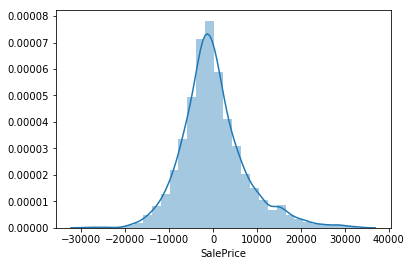

In [331]:
#fig,ax1=plt.subplot(1,1)
sns.distplot(a,bins=30)


In [332]:
best_score['new']=y_predict

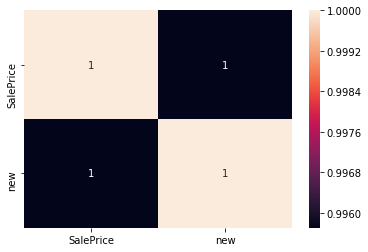

In [333]:
sns.heatmap(best_score[['SalePrice','new']].corr(),annot=True)

## Random Forest Regressor

In [335]:
from sklearn.ensemble import RandomForestRegressor

In [336]:
rfs=RandomForestRegressor()

In [337]:
svr=rfs.fit(x_train_f,y_train)

In [338]:
y_predict=svr.predict(x_test_f)

In [339]:
y_predict

array([130305.5 , 157140.75, 179595.18, ..., 161202.04, 112173.5 ,
       225794.36])

In [340]:
#  # Saving the results in Csv
data={'Id':range(1461,2920),'SalePrice':y_predict}
pd.DataFrame(data).set_index('Id').to_csv(r'submission files/submission_mhdLR.csv')

In [341]:
best_score=pd.read_csv(r'submission files/submission_lr.csv')

In [342]:
a=best_score['SalePrice']-y_predict

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


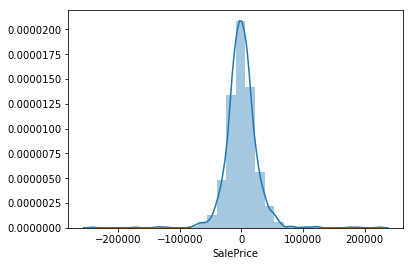

In [343]:
#fig,ax1=plt.subplot(1,1)
sns.distplot(a,bins=30)


In [344]:
best_score['new']=y_predict

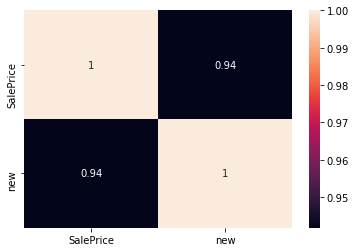

In [345]:
sns.heatmap(best_score[['SalePrice','new']].corr(),annot=True)